In [16]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import torchvision. transforms as transforms
import torchvision.datasets
from bokeh.plotting import figure
from bokeh.io import show
from bokeh.models import LinearAxis, Range1d
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

import torchvision
import torchvision.transforms as transforms

In [28]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])

train_dataset = torchvision.datasets.CIFAR10(root = './data', train = True, transform = transform, download= True)
test_dataset = torchvision.datasets.CIFAR10(root = './data', train = False, transform = transform, download= True)

Files already downloaded and verified
Files already downloaded and verified


In [18]:
num_epochs = 25
num_classes = 10
batch_size  = 64
learning_rate = 0.001

In [19]:
train_loader = DataLoader(dataset = train_dataset, batch_size=batch_size,shuffle = True)
test_loader = DataLoader(dataset = train_dataset, batch_size=batch_size,shuffle = False)

In [20]:
class ConvNet(nn.Module):
  def __init__(self):
    super(ConvNet, self).__init__()
    self.layer1 = nn.Sequential(
        nn.Conv2d(3,32,kernel_size=5,stride=1,padding=2),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,stride=2))

    self.layer2 = nn.Sequential(
        nn.Conv2d(32,64,kernel_size=5,stride=1,padding=2),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,stride=2)
    )
    self.drop_out = nn.Dropout()

    self.fc1 = nn.Linear(8*8*64,100)
    self.fc2 = nn.Linear(100,10)

  def forward(self,x):
    out = self.layer1(x)
    out = self.layer2(out)
    out = out.reshape(out.size(0), -1)
    out = self.drop_out(out)
    out = self.fc1(out)
    out = self.fc2(out)
    return out

model = ConvNet()

In [21]:
def count_parameters(model):
  total_params = 0
  for param in model.parameters():
    total_params += param.numel()
    return total_params

conv_net = ConvNet()
num_params = count_parameters(conv_net)
print(num_params)

2400


In [22]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr = learning_rate)

In [23]:
total_step =  len(train_loader)
loss_list = []
acc_list = []

loss_plot = []
acc_plot = []
epoch_plot = []

for epoch in range(num_epochs):
  for i, (images,labels) in enumerate(train_loader):
    outputs = model(images)
    loss= criterion(outputs,labels)
    loss_list.append(loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    total = labels.size(0)
    _,predicted = torch.max(outputs.data,1)
    correct = (predicted == labels).sum().item()
    acc_list.append(correct / total)

    epoch_plot.append(epoch+1)

    if (i+1) % 50 == 0 :
      print('Epoch [{}/{}], Step [{}/{}], Loss:{:.4f}, Accuracy:{:.2f}%'
      .format(epoch+1,num_epochs,i+1,total_step,loss.item(),(correct/total)*100))
      loss_plot.append(loss.item())
      acc_plot.append(correct/total)

Epoch [1/25], Step [50/157], Loss:1.9551, Accuracy:26.56%
Epoch [1/25], Step [100/157], Loss:1.4407, Accuracy:56.25%
Epoch [1/25], Step [150/157], Loss:1.5030, Accuracy:43.75%
Epoch [2/25], Step [50/157], Loss:1.3694, Accuracy:48.44%
Epoch [2/25], Step [100/157], Loss:1.3054, Accuracy:54.69%
Epoch [2/25], Step [150/157], Loss:1.2689, Accuracy:46.88%
Epoch [3/25], Step [50/157], Loss:1.2407, Accuracy:65.62%
Epoch [3/25], Step [100/157], Loss:1.1869, Accuracy:60.94%
Epoch [3/25], Step [150/157], Loss:1.2502, Accuracy:51.56%
Epoch [4/25], Step [50/157], Loss:1.3907, Accuracy:48.44%
Epoch [4/25], Step [100/157], Loss:1.2057, Accuracy:60.94%
Epoch [4/25], Step [150/157], Loss:1.1964, Accuracy:48.44%
Epoch [5/25], Step [50/157], Loss:0.9153, Accuracy:65.62%
Epoch [5/25], Step [100/157], Loss:0.8663, Accuracy:76.56%
Epoch [5/25], Step [150/157], Loss:1.2328, Accuracy:51.56%
Epoch [6/25], Step [50/157], Loss:1.0765, Accuracy:56.25%
Epoch [6/25], Step [100/157], Loss:1.1032, Accuracy:59.38%
Epo

In [24]:
model.eval()
with torch.no_grad():
  correct = 0
  total = 0
  for images, labels in test_loader:
    outputs = model(images)
    _,predicted = torch.max(outputs.data,1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
  print('Test Accuracy of the model on the 10000 images: {} %'.format((correct/total)*100))

torch.save(model.state_dict(),'conv_net_model.ckpt')

Test Accuracy of the model on the 10000 images: 92.04 %


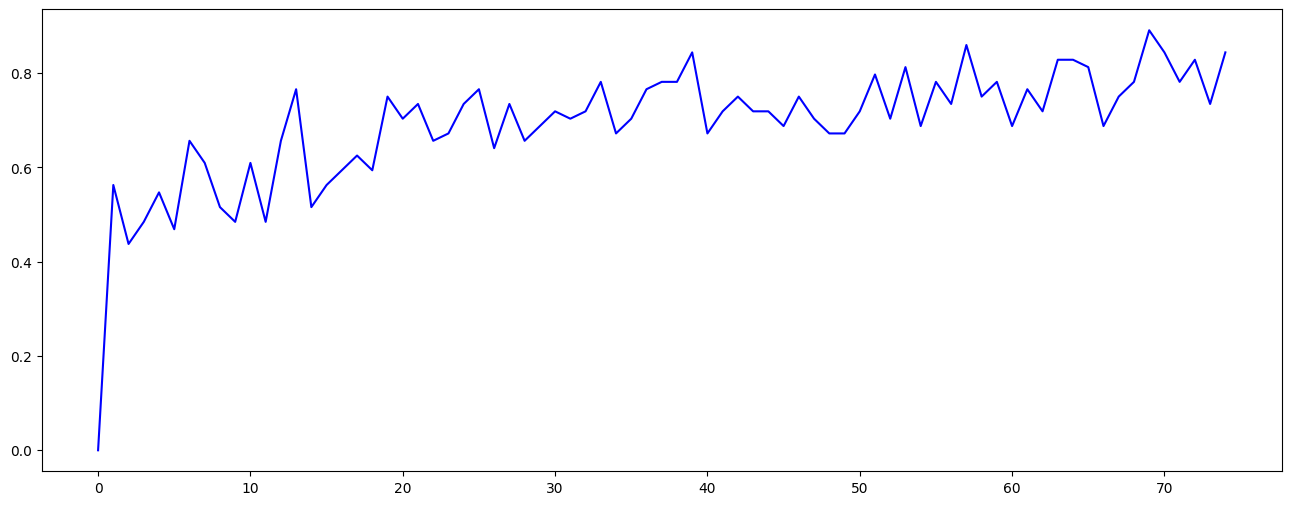

In [25]:
acc_plot[0] = 0

plt.figure(figsize=(16,6))
plt.plot(acc_plot,'b-')
plt.show()

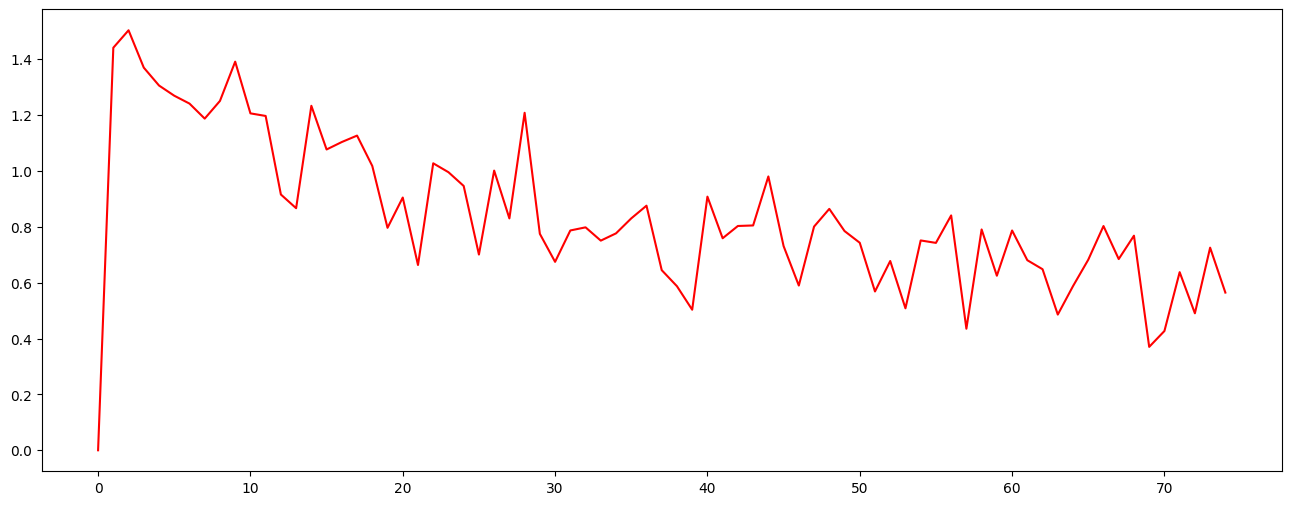

In [26]:
loss_plot[0] = 0

plt.figure(figsize=(16,6))
plt.plot(loss_plot,'r-')
plt.show()

In [27]:
def image_plot(image, label):
  labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
  fig, ax = plt.subplots (figsize=(1,1))
  image = image.permute(1, 2, 0).numpy()
  ax.imshow(image)
  ax.axis('off')
  plt.title(labels[label])
  plt.show()

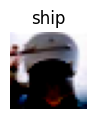

True ship Predicted: ship


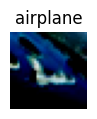

True airplane Predicted: airplane


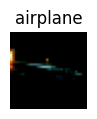

True airplane Predicted: airplane


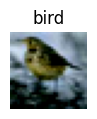

True bird Predicted: bird


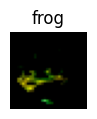

True frog Predicted: frog


In [30]:
from random import randint

labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for _ in range(5):
  random_index = randint(1,10000)
  image = test_dataset[random_index][0];label = test_dataset[random_index][1]

  image_plot(image,label)
  model.eval()
  with torch.no_grad():
    predictions = model(image.unsqueeze(0))

  _,predicted =  torch.max(predictions,1)

  print('True', labels[label],'Predicted:',labels[predicted])

In [32]:
torch.save(model.state_dict(), './model')
model = ConvNet()
model.load_state_dict(torch.load('./model'))
model.eval()

ConvNet(
  (layer1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (drop_out): Dropout(p=0.5, inplace=False)
  (fc1): Linear(in_features=4096, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=10, bias=True)
)